In [80]:
#Write a Python program that accepts the user's first and last name and prints them in reverse order with a space between them.
s1=input("enter 1st name:")
s2=input("enter last name:")
print(s2,s1)


enter 1st name: jahnavi
enter last name: reddy


reddy jahnavi


In [13]:
import pandas as pd
import numpy as np
data = {
    "Sales": [250, 340, np.nan, 120, 450, 380, np.nan, 290, 310, 500, 400, 220, np.nan, 370, 330, 280, 390, 410, 520, np.nan],
    "Profit": [50, 70, 30, np.nan, 90, 60, 40, 45, np.nan, 100, 80, 35, 25, 75, 65, np.nan, 85, 95, 110, 20],
    "Region": ["East", "West", "South", "East", "North", "West", "South", np.nan, "East", "North",
               "West", "South", "East", np.nan, "North", "West", "South", "East", "North", "South"],
    "Product_Category": ["Furniture", "Technology", "Office Supplies", "Furniture", np.nan, 
                          "Office Supplies", "Technology", "Furniture", "Office Supplies", 
                          "Technology", "Furniture", np.nan, "Office Supplies", "Technology", 
                          "Furniture", "Office Supplies", "Technology", "Furniture", "Office Supplies", "Technology"]
}

df_global_superstore = pd.DataFrame(data)
df_global_superstore.head()

,Sales,Profit,Region,Product_Category
0,250.0,50.0,East,Furniture
1,340.0,70.0,West,Technology
2,NaN,30.0,South,Office Supplies
3,120.0,NaN,East,Furniture
4,450.0,90.0,North,NaN


In [25]:
#CLEAN DATA
#Handle missing values by filling them with appropriate measures (mean,median, or placeholders) or by removing affected rows/columns
df_global_superstore.isnull().sum()


Sales               4
Profit              3
Region              2
Product_Category    2
dtype: int64

In [19]:
df_global_superstore.drop_duplicates(inplace=True)
df_global_superstore.head()

,Sales,Profit,Region,Product_Category
0,250.0,50.0,East,Furniture
1,340.0,70.0,West,Technology
2,NaN,30.0,South,Office Supplies
3,120.0,NaN,East,Furniture
4,450.0,90.0,North,NaN


In [37]:
# Detecting and handling outliers using IQR for 'Sales' and 'Profit'
Q1_sales = df_global_superstore['Sales'].quantile(0.25)
Q3_sales = df_global_superstore['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
Q1_profit = df_global_superstore['Profit'].quantile(0.25)
Q3_profit = df_global_superstore['Profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit
# Define outlier bounds
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit
# Removing outliers
df_global_superstore = df_global_superstore[
    (df_global_superstore['Sales'] >= lower_bound_sales) & (df_global_superstore['Sales'] <= upper_bound_sales) &
    (df_global_superstore['Profit'] >= lower_bound_profit) & (df_global_superstore['Profit'] <= upper_bound_profit)]
# Displaying the cleaned data frame
df_global_superstore

,Sales,Profit,Region,Product_Category
0,250.0,50.000000,East,Furniture
1,340.0,70.000000,West,Technology
2,347.5,30.000000,South,Office Supplies
4,450.0,90.000000,North,Miscellaneous
5,380.0,60.000000,West,Office Supplies
6,347.5,40.000000,South,Technology
7,290.0,45.000000,Unknown,Furniture
8,310.0,63.235294,East,Office Supplies
10,400.0,80.000000,West,Furniture
11,220.0,35.000000,South,Miscellaneous


In [47]:
measures = {
    "Mean": df_global_superstore.mean(numeric_only=True),
    "Median": df_global_superstore.median(numeric_only=True),
    "Standard Deviation": df_global_superstore.std(numeric_only=True),
    "Variance": df_global_superstore.var(numeric_only=True)
}
correlations = df_global_superstore.corr(numeric_only=True)
measures, correlations

({'Mean': Sales     341.764706
  Profit     58.321799
  dtype: float64,
  'Median': Sales     347.500000
  Profit     63.235294
  dtype: float64,
  'Standard Deviation': Sales     58.828171
  Profit    23.113925
  dtype: float64,
  'Variance': Sales     3460.753676
  Profit     534.253511
  dtype: float64},
            Sales    Profit
 Sales   1.000000  0.554866
 Profit  0.554866  1.000000)

In [45]:
measures = {
    "Mean": df_global_superstore.mean(numeric_only=True),
}
correlations = df_global_superstore.corr(numeric_only=True)
measures, correlations

({'Mean': Sales     341.764706
  Profit     58.321799
  dtype: float64},
            Sales    Profit
 Sales   1.000000  0.554866
 Profit  0.554866  1.000000)

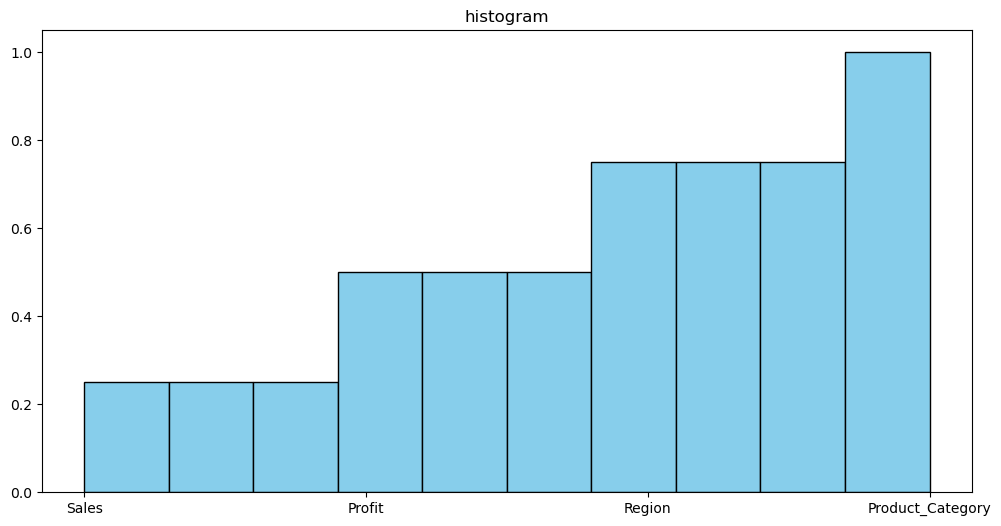

In [61]:
plt.hist(data,color='skyblue',density=True,cumulative=True,edgecolor='black')#bins=30
plt.title('histogram')
plt.show()

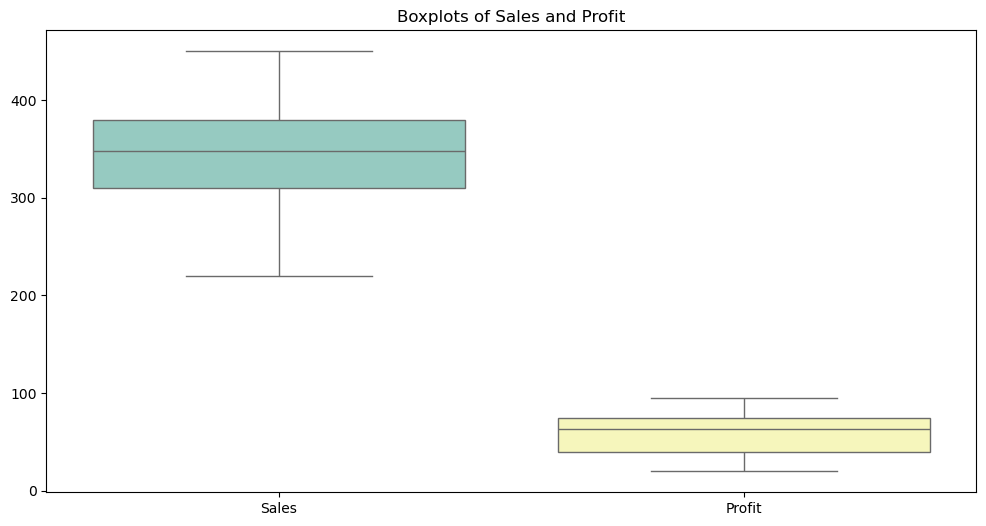

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_global_superstore[['Sales', 'Profit']], palette="Set3")
plt.title("Boxplots of Sales and Profit")
plt.show()

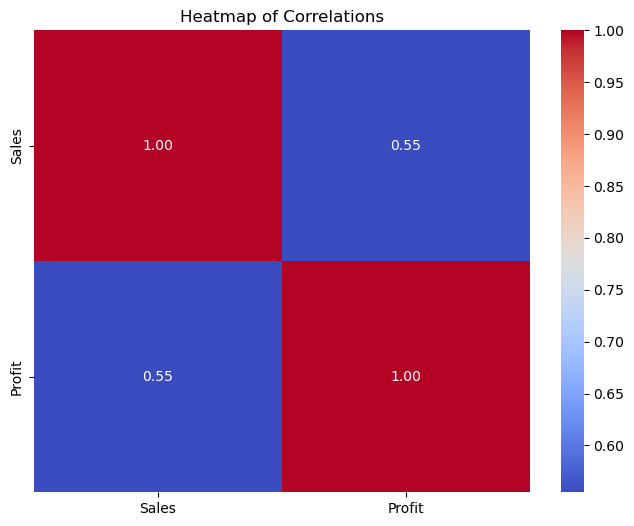

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_global_superstore.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()